In [6]:
! pip install datasets
! pip install evaluate

In [7]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
import shutil
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

stop_words = list(set(stopwords.words('english')))
more_stop_words = ["(", ")", "--", "*", ":", "-", "may", "though", ";",
         "thing", "things", "'d", "'ll", "'m", "'ve", "'t", "'s",
         "'re", "a", "about", "above", "after", "again", "against",
         "ain", "all", "am", "an", "and", "any", "are", "aren't",
         "as", "at", "be", "because", "been", "before", "being", "below",
         "between", "both", "but", "by", "can", "could", "couldn't",
         "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down",
         "during", "each", "few", "for", "from", "further", "had", "hadn't",
         "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll",
         "he's", "her", "here", "here's", "hers", "herself", "him", "himself",
         "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in",
         "into", "is", "isn't", "it", "it's", "its", "itself", "just", "let's",
         "me", "mightn't", "more", "most", "mustn't", "my", "myself",
         "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once",
         "only", "or", "other", "ought", "our", "ours", "ourselves", "out",
         "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's",
         "should", "should've", "shouldn't", "so", "some", "such", "t", "than",
         "that", "that'll", "that's", "the", "their", "theirs", "them",
         "themselves", "then", "there", "there's", "these", "they", "they'd",
         "they'll", "they're", "they've", "this", "those", "through", "to",
         "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd",
         "we'll", "we're", "we've", "were", "weren't", "what", "what's",
         "when", "when's", "where", "where's", "which", "while", "who",
         "who's", "whom", "why", "why's", "will", "with", "won't", "would",
         "wouldn", "wouldn't", "y'all", "you", "you'd", "you'll", "you're",
         "you've", "your", "yours", "yourself", "yourselves", ",", ".", "!",
         "?", "'", '"', "I", "i","im","Im","br"]

stop_words.extend(more_stop_words)
stop_words = list(set(stop_words))

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
train = '/content/drive/MyDrive/Boston College/2025 Spring/NLP/NLP project/new_train_data.csv'
test = '/content/drive/MyDrive/Boston College/2025 Spring/NLP/NLP project/new_test_data.csv'
train_path = '/content/train.csv'
test_path = '/content/test.csv'

In [12]:
shutil.copy(train, train_path)
shutil.copy(test, test_path)


'/content/test.csv'

# Data cleaning

In [15]:
y

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,char_count,word_count,word_density,punctuation_count,predicted_sentiment,predicted_class,predicted_sentiment_numerical,predicted_sentiment_num,predicted_numeric,ground_truth
0,298057,B003AZ2ECY,A1IKJDANTE0OE0,gluten-free mom,1,3,1,1345766400,Not Gluten-Free,item listed glutenfree products absolutely glu...,...,149,20,7.095238,0,positive,2,2,2,2,negative
1,37903,B000F6SNPS,A12MVVDKHK1QA0,Jon,4,8,1,1280188800,Artificial Flavor!,bought tea find third ingredient artificial fl...,...,481,60,7.885246,0,neutral,1,1,1,1,negative
2,76898,B0045TVL6E,A1I71HXN9ZWKUB,JN,0,0,4,1348704000,Taste Great but Pricey; Great Gluten Free Option,buffalo jerky bites taste great expensive espe...,...,337,48,6.877551,0,positive,2,2,2,2,positive
3,86693,B001OC4I2E,A3OF8BUR3U49G1,Shane S,2,2,2,1307750400,Not Ideal for the Task,playing sports many years thought lace cover w...,...,446,67,6.558824,0,positive,2,2,2,2,negative
4,46041,B001EO5QZK,A1S7MC961R4WE4,Ash,2,5,3,1167868800,Not Strong enough,tea ok like tea strong dash milk best,...,37,8,4.111111,0,positive,2,2,2,2,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,287532,B002T0IHJ0,AA78TCLHXPJOK,"Timothy G. Berntsen ""Guru of geekdom""",0,0,2,1336348800,"A fairly ""meh"" generic cola.",love soda stream mixes ive used quite good pre...,...,765,122,6.219512,0,positive,2,2,2,2,negative
996,27148,B001D3K2AG,A5PPSTSV20GET,Sykker,0,0,4,1342656000,Gum with a nice bite,sure theres much say gum favorite gum decided ...,...,200,34,5.714286,0,positive,2,2,2,2,positive
997,168090,B005VOOKS8,AJ86MYUT3VJE5,K. Polzin,11,17,3,1332460800,"Smells good, but tastes like coffee-flavored w...",pods make liquid tastes like coffeeflavored wa...,...,710,108,6.513761,0,positive,2,2,2,2,neutral
998,82493,B003IDF86C,A1I1S99FXN4WU5,"Lorilyn Tenney ""Lorilyn Tenney""",5,5,5,1287100800,"Love the protein-packed snack, but Amazon's pr...",stumbled anns soy energy blend costco two mont...,...,785,128,6.085271,0,neutral,1,1,1,1,positive


In [27]:
def clean_review(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"\@w+|\#", '', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", ' ', text).strip()
    text = re.sub(r'<.*?>', ' ', text)
    for word in stop_words:
        text = text.replace(rf'\b{word}\b', '')
    return text

train = pd.read_csv(train_path)
train.dropna(subset=['Text'], inplace=True)
train["Text"] = train["Text"].apply(clean_review)
test = pd.read_csv(test_path)
test.dropna(subset=['Text'], inplace=True)
test["Text"] = test["Text"].apply(clean_review)

# data["Text+Summary"] = data["Summary"] + " " + data["Text"]
# data.dropna(subset=['Text+Summary'], inplace=True)
# data["Text+Summary"] = data["Text+Summary"].apply(clean_review)

In [31]:
lemmatizer = WordNetLemmatizer()

num_lemmas = []
num_tokens = []

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    num_lemmas.append(len(lemmas))
    return ' '.join(lemmas)

train["Text"] = train["Text"].apply(lemmatize_text)
test["Text"] = test["Text"].apply(lemmatize_text)

# Train model

In [32]:
train.shape

(9000, 23)

In [33]:
test.shape

(1000, 23)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=5000) # Limit vocab size
# X = vectorizer.fit_transform(data["Text+Summary"])  # `reviews` is a list of strings (your Amazon review texts)

In [35]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y['ground_truth'],
#     test_size=0.2,
#     random_state=42,
#     stratify=y
# )

X_train = train
X_test = test
y_train = train['ground_truth']
y_test = test['ground_truth']

In [36]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [39]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train['Text']) # Fit on the 'Text' column of X_train
X_test_vec  = vectorizer.transform(X_test['Text'])    # Transform X_test using the same vectorizer

In [40]:
X_train_tensor = torch.tensor(X_train_vec.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_enc, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_vec.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_enc, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32)

In [41]:
import torch.nn as nn

class BoWClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [42]:
model = BoWClassifier(input_dim=5000, hidden_dim=128, output_dim=3)

In [43]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# model.train()
# for epoch in range(5):
#     for inputs, targets in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
#     print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

for epoch in range(5):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 246.5973
Epoch 2, Loss: 165.9280
Epoch 3, Loss: 114.1427
Epoch 4, Loss: 72.8519
Epoch 5, Loss: 44.3223


In [44]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, dim=1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

print(confusion_matrix(all_labels, all_preds))
target_names = [str(c) for c in label_encoder.classes_]
print(classification_report(all_labels, all_preds, target_names=target_names))

[[303  44  53]
 [ 80  65  55]
 [ 58  60 282]]
              precision    recall  f1-score   support

    negative       0.69      0.76      0.72       400
     neutral       0.38      0.33      0.35       200
    positive       0.72      0.70      0.71       400

    accuracy                           0.65      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.64      0.65      0.64      1000



In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print("Confusion Matrix:")
print(cm := confusion_matrix(all_labels, all_preds))

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["negative", "neutral", "positive"]))

Confusion Matrix:
[[303  44  53]
 [ 80  65  55]
 [ 58  60 282]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.76      0.72       400
     neutral       0.38      0.33      0.35       200
    positive       0.72      0.70      0.71       400

    accuracy                           0.65      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.64      0.65      0.64      1000



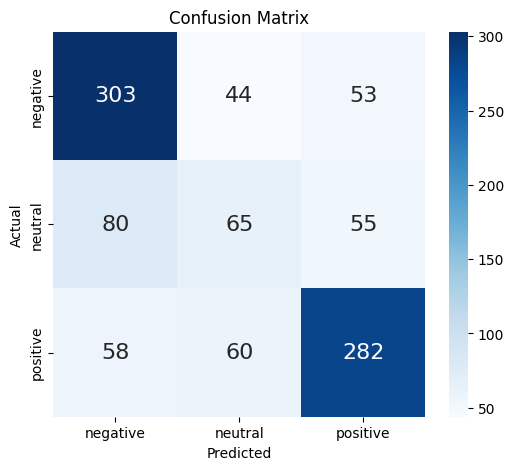

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: define class labels
class_names = ["negative", "neutral", "positive"]

# Plot using seaborn (nicer visuals)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names,annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()